In [92]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


In [93]:
# Define the state space
states = ["Sunny", "Rainy"]
n_states = len(states)
print('Number of hidden states :',n_states)


# Define the observation space
observations = ["Dry", "Wet"]
n_observations = len(observations)
print('Number of observations :',n_observations)


Number of hidden states : 2
Number of observations : 2


In [94]:
# Define the initial state distribution
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
								[0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)
# Define the observation likelihoods
emission_probability= np.array([[0.9, 0.1],
								[0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)


State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [95]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability


In [96]:
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]).reshape(-1, 1)
observations_sequence


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [97]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)


Most likely hidden states: [0 0 0 0 0 0 0 0 0 0 0]


In [98]:
log_probability, hidden_states = model.decode(observations_sequence,
											lengths = len(observations_sequence),
											algorithm ='viterbi' )

print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)


Log Probability : -5.825455913671321
Most likely hidden states: [0 0 0 0 0 0 0 0 0 0 0]


### Example 2

Most likely hidden states: [0 0 0 0 0 0 0 0]


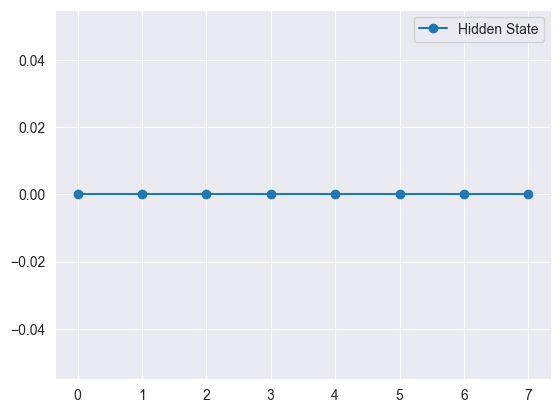

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

# Define the state space
states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

# Define the observation space
observations = ["Loud", "Soft"]
n_observations = len(observations)

# Define the initial state distribution
start_probability = np.array([0.8, 0.1, 0.1, 0.0])

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
									[0.0, 0.6, 0.4, 0.0],
									[0.0, 0.0, 0.6, 0.4],
									[0.0, 0.0, 0.0, 1.0]])

# Define the observation likelihoods
emission_probability = np.array([[0.7, 0.3],
								[0.4, 0.6],
								[0.6, 0.4],
								[0.3, 0.7]])

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)

# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

# Plot the results
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()
